<center>

# Shopify data analysis task

#### *Pooja Bandal*

</center>



## Importing libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statistics

## Reading Dataset

In [2]:
df = pd.read_csv('data.csv')
df.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11


## Checking the value given in the question

Its just a simple average of the the column order amount, the approach is very naive and the value itself seems too high to be of any importance and hence provides a biased insight.

### Naive aproach to calculate AOV (Calculating mean)

In [3]:
# geting the column 'order_amount' values in a list
order_amount_list= df['order_amount'].values.tolist()
print(f'Average value of order (AOV amounts is {np.mean(order_amount_list)}.')

Average value of order (AOV amounts is 3145.128.


## Visualizations

Why I think, that just having mean will provide a biased inisght will be more clear with the plots. As we can see there are a few **outliers** which are actually make the average values much more than what it should be.

While reporting average we should actually take these big orders into account as they are not a normal order. Therefore, I will try to remove these big orders from all of the orders and then find average values of a normal order because they are the orders which occur more frequently.

### Scatter plots

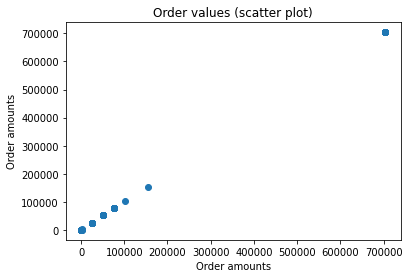

In [4]:
fig = plt.figure()
plt.scatter(order_amount_list, order_amount_list)
plt.title('Order values (scatter plot)')
plt.xlabel('Order amounts')
plt.ylabel('Order amounts')
plt.show()

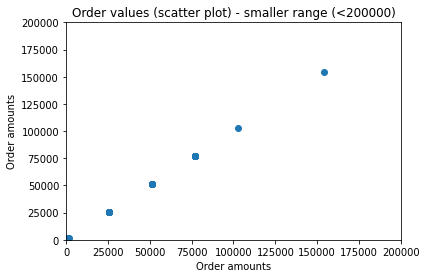

In [5]:
plt.scatter(order_amount_list, order_amount_list)
plt.title('Order values (scatter plot) - smaller range (<200000)')
plt.xlabel('Order amounts')
plt.ylabel('Order amounts')
plt.ylim(0, 200000)
plt.xlim(0, 200000)
plt.show()

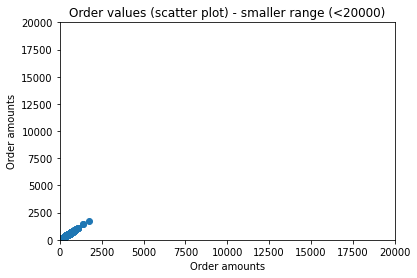

In [6]:
plt.scatter(order_amount_list, order_amount_list)
plt.title('Order values (scatter plot) - smaller range (<20000)')
plt.xlabel('Order amounts')
plt.ylabel('Order amounts')
plt.ylim(0, 20000)
plt.xlim(0, 20000)
plt.show()

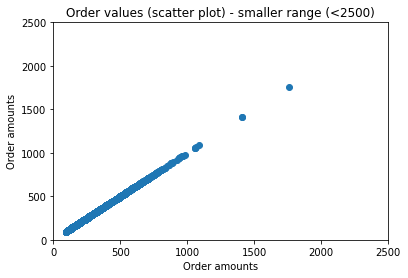

In [7]:
plt.scatter(order_amount_list, order_amount_list)
plt.title('Order values (scatter plot) - smaller range (<2500)')
plt.xlabel('Order amounts')
plt.ylabel('Order amounts')
plt.ylim(0, 2500)
plt.xlim(0, 2500)
plt.show()

Looks like values under 2500 have a more even spread therefore we can consider 2500 as the cut-off point and anything about it can be considered as an outlier. Checking how many values belong to which range.


In [8]:
# setting the threshold
th = 2500

per = (len([val for val in order_amount_list if val < th])/(len(order_amount_list)))*100
print(f'Percentage of orders with values less than {th} is: {round(per, 3)}%')

Percentage of orders with values less than 2500 is: 98.74%


Therefore on choosing **2,500** as a threshold we will only remove ~ **1.5%** of the orders which are very significant but not a good representative of an average order. Thus, we will analyze ~ **98.75%** of the data which seem more like an average data.

### Box plot

entire distribution

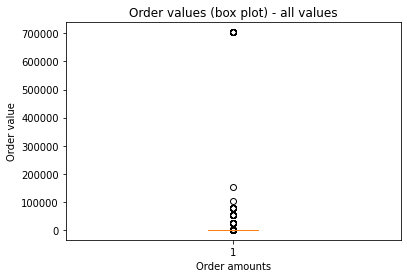

In [9]:
fig = plt.figure()
plt.boxplot(order_amount_list)
plt.title('Order values (box plot) - all values')
plt.xlabel('Order amounts')
plt.ylabel('Order value')
plt.show()

values below threshold

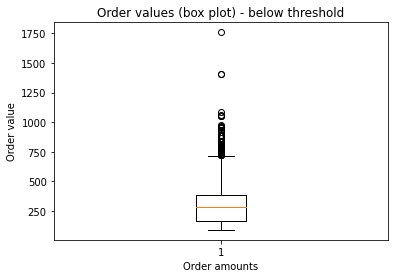

In [10]:
fig = plt.figure()
plt.boxplot([val for val in order_amount_list if val < th])
plt.title('Order values (box plot) - below threshold')
plt.xlabel('Order amounts')
plt.ylabel('Order value')
plt.show()

### Bar plot

entire range

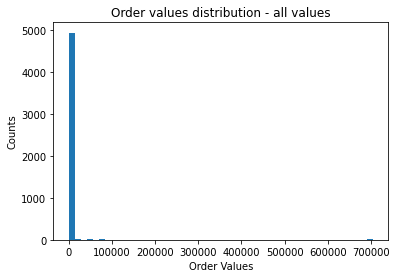

In [11]:
fig = plt.figure()
plt.hist(order_amount_list, bins = 50)
plt.title('Order values distribution - all values')
plt.xlabel('Order Values')
plt.ylabel('Counts')
plt.show()

values below threshold

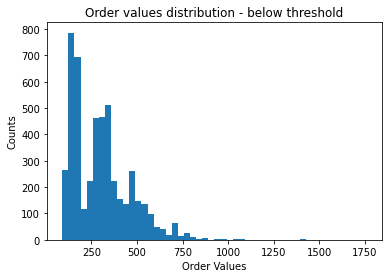

In [12]:
fig = plt.figure()
plt.hist([val for val in order_amount_list if val < th], bins = 50)
plt.title('Order values distribution - below threshold')
plt.xlabel('Order Values')
plt.ylabel('Counts')
plt.show()

From the histogram we can see that there are outlier values which are affecting AOV. Thus we will try to remove these outliers and then compute different necessary statistical values. 

## Removing outliers from **order-values**
For removing the outliers from order-values, we need to decide a threshold value which determines weather a point is an outlier or not. We do so by using a threshold of **2,500** 

In [13]:
order_amount_list_lt_th = [val for val in order_amount_list if val < th]

## Calculating mean after removing outliers 

#### Value of AOV after removing outliers.

In [14]:
average_value_without_outlier = np.mean(order_amount_list_lt_th)
print(f'Average value of order (AOV) amounts without threshold is {round(np.mean(average_value_without_outlier), 3)}.')

Average value of order (AOV) amounts without threshold is 302.581.


A much more insightful **AOV** is this average order values without outliers (which are significantly big orders worth > **2,500**), this new **AOV** is **302.581**.

## Approach-2
In presence of outliers its better to use different statistical measures like median and mode because they are more insightful than mean which will get affected significantly in presence of outliers.

## Median 

It's best to use the median when the the distribution of data values is skewed and when there are clear outliers.

In [15]:
median_order_value = np.median(order_amount_list)
print(f'Median of order values is {median_order_value}')

Median of order values is 284.0


## Approach-3

The mode is the least used of the measures of central tendency and can only be used when dealing with nominal data. For this reason, the mode will be the best measure of central tendency (as it is the only one appropriate to use) when dealing with nominal data.

In [16]:
mode_order_value = statistics.mode(order_amount_list)
print(f'Mode of order values is {mode_order_value}')

Mode of order values is 153


## Conclusion 

These values mode **153**, median **284** and mean (without outliers) **302.581** are much more relevant and in accordance of an average order and thus can be used to analyze an order in average.

In [17]:
# END